In [1]:
from tracemalloc import start
import csv
from collections import defaultdict
from utils import load_stop_times_df
from tqdm import tqdm
import networkx as n
import json
import pandas as pd
from utils import load_stops
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.ndimage import gaussian_filter
import math as m
import matplotlib as mpl
from matplotlib import cm
from sklearn.preprocessing import minmax_scale
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
import glob
import os
from utils import load_stops_as_dict
from utils import load_stop_times_df


Text(0.5, 1.0, 'Number of busstops')

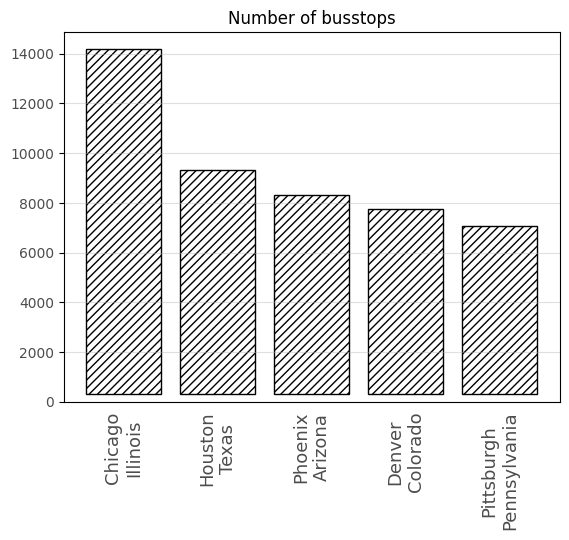

In [11]:
# check total numbers of unique stops

all_cities = glob.glob("data/*")
all_cities.pop(0)

all_cities = [os.path.basename(i) for i in all_cities] # convert full path to only the city name


counting = {} 

for i in all_cities:

    name = i.replace("US_", "")
    name = name.replace("_", ", ")
    name = name.split(" ")
    name = str(name[1]) + "\n" + str(name[0])
    name = name[:-1]

    try:
        all_stops = load_stops_as_dict(i)
    except:
        #print("can't open", i)
        pass
 
    counting[name] = len(all_stops.keys())


res = dict(sorted(counting.items(), key=lambda x: x[1], reverse = True))

# plt
names, counts = zip(*res.items())
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.bar(names[0:5], counts[0:5], color = "white", edgecolor = "black", clip_on = False, bottom=[300, 300, 300, 300, 300], hatch = "////")
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(right = False, left = True)
#plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of busstops")

can't open data\US_California_Anaheim
can't open data\US_California_Dixon
can't open data\US_California_Monrovia
can't open data\US_California_Wasco
can't open data\US_Oregon_Redmond


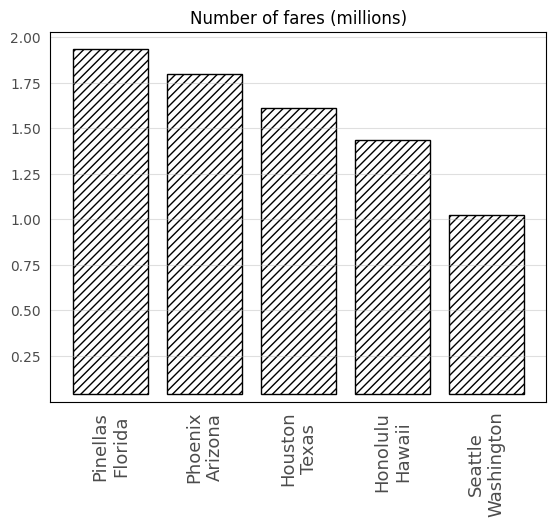

In [26]:
# total number of fares per city
# TODO achsenbeschirftungen und bottom

all_cities = glob.glob("data/*")
all_cities.pop(0)

counting = {} 

for i in all_cities:

    name = os.path.basename(i)
    name = name.replace("US_", "")
    name = name.replace("_", ", ")
    name = name.split(" ")
    name = str(name[1]) + "\n" + str(name[0])
    name = name[:-1]

    try:
        counting[name] = len([line for line in open(i + "/stop_times.txt")]) / 1000000 
    except:
        print("can't open", i)
        pass


res = dict(sorted(counting.items(), key=lambda x: x[1], reverse = True))



# plt
names, counts = zip(*res.items())
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.bar(names[0:5], counts[0:5], color = "white", edgecolor = "black", clip_on = False, bottom=[0.04]*5, hatch = "////")
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of rides (millions)")
plt.show()